In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a sample dataset
data = {
    "Pregnancies": [2, 5, 0, 3, 6, 1, 4, 7, 8, 2],
    "Glucose": [85, 120, 150, 95, 180, 89, 140, 155, 160, 130],
    "BloodPressure": [66, 74, 80, 90, 105, 72, 85, 110, 100, 95],
    "SkinThickness": [29, 35, 40, 23, 45, 32, 37, 50, 30, 34],
    "Insulin": [0, 130, 0, 100, 200, 0, 150, 220, 190, 170],
    "BMI": [26.6, 32.1, 35.5, 40.2, 28.3, 29.8, 37.1, 38.5, 41.2, 36.8],
    "DiabetesPedigreeFunction": [0.351, 0.672, 0.545, 0.678, 0.735, 0.194, 0.582, 0.865, 1.1, 0.734],
    "Age": [25, 40, 35, 50, 45, 30, 55, 60, 65, 33],
    "Outcome": [0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV file
df.to_csv("diabetes_dataset.csv", index=False)

print(" Dataset Created and Saved as 'diabetes_dataset.csv'")

# Load the dataset
df = pd.read_csv("diabetes_dataset.csv")


 Dataset Created and Saved as 'diabetes_dataset.csv'


In [3]:
#  Print the correlation matrix and find factors influencing BMI
correlation_matrix = df.corr()
print("\n Correlation Matrix:\n", correlation_matrix)


 Correlation Matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.582149       0.680588       0.321367   
Glucose                      0.582149  1.000000       0.756137       0.711801   
BloodPressure                0.680588  0.756137       1.000000       0.514368   
SkinThickness                0.321367  0.711801       0.514368       1.000000   
Insulin                      0.836181  0.682851       0.859676       0.434254   
BMI                          0.325710  0.273121       0.524527      -0.096061   
DiabetesPedigreeFunction     0.795323  0.691063       0.793695       0.217249   
Age                          0.812585  0.575235       0.719834       0.226890   
Outcome                      0.582772  0.809624       0.403474       0.650887   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.836181  0.325710                  0.795323   
Glucose           

In [4]:

#  Number of patients who have diabetes (Outcome = 1)
diabetic_patients = df[df["Outcome"] == 1]
print("\n Number of Patients with Diabetes:", len(diabetic_patients))


 Number of Patients with Diabetes: 6


In [5]:
#  Records of patients who have BMI between 35 to 40
bmi_filtered = df[(df["BMI"] >= 35) & (df["BMI"] <= 40)]
print("\n Patients with BMI between 35 to 40:\n", bmi_filtered)


 Patients with BMI between 35 to 40:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            0      150             80             40        0  35.5   
6            4      140             85             37      150  37.1   
7            7      155            110             50      220  38.5   
9            2      130             95             34      170  36.8   

   DiabetesPedigreeFunction  Age  Outcome  
2                     0.545   35        1  
6                     0.582   55        1  
7                     0.865   60        1  
9                     0.734   33        0  


In [6]:

#  BloodPressure, BMI, and Outcome of patients with BloodPressure > 100
high_bp_patients = df[df["BloodPressure"] > 100][["BloodPressure", "BMI", "Outcome"]]
print("\n Patients with BloodPressure > 100:\n", high_bp_patients)



 Patients with BloodPressure > 100:
    BloodPressure   BMI  Outcome
4            105  28.3        1
7            110  38.5        1


<ipython-input-7-d9ce302b6182>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Age"], shade=True, color='green')


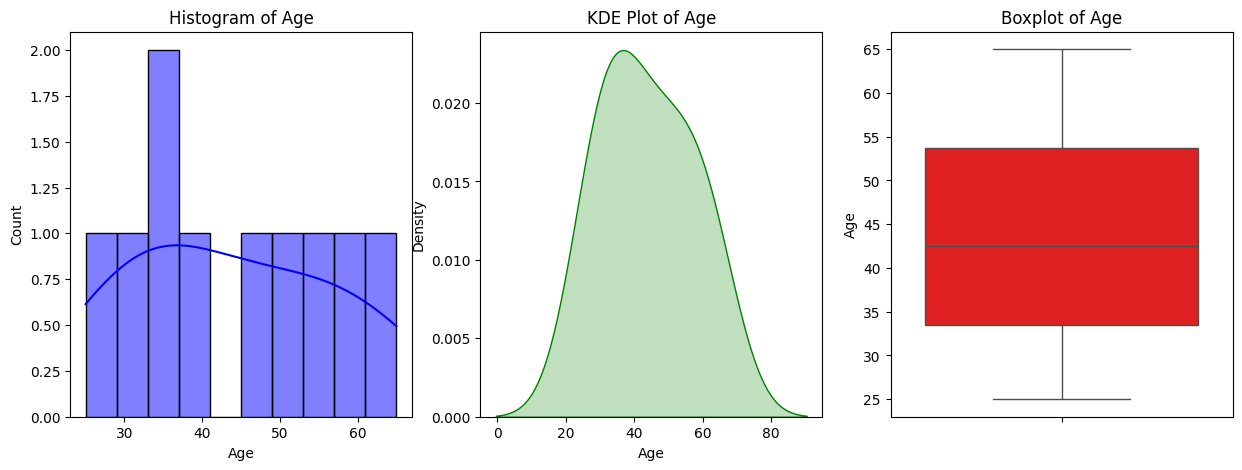

In [7]:

#  Univariate analysis on Age
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df["Age"], bins=10, kde=True, color='blue')
plt.title("Histogram of Age")

plt.subplot(1,3,2)
sns.kdeplot(df["Age"], shade=True, color='green')
plt.title("KDE Plot of Age")

plt.subplot(1,3,3)
sns.boxplot(y=df["Age"], color='red')
plt.title("Boxplot of Age")

plt.show()

In [8]:
#  Calculate BMI outliers using IQR and validate with boxplot
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\n Outlier Thresholds for BMI:")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

outliers = df[(df["BMI"] < lower_bound) | (df["BMI"] > upper_bound)]
print("\n Outlier Records for BMI:\n", outliers)


 Outlier Thresholds for BMI:
Lower Bound: 18.712500000000002, Upper Bound: 49.8125

 Outlier Records for BMI:
 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


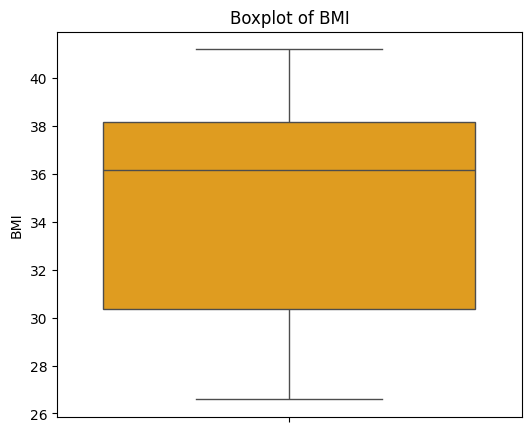

In [9]:
# Boxplot to validate outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["BMI"], color="orange")
plt.title("Boxplot of BMI")
plt.show()


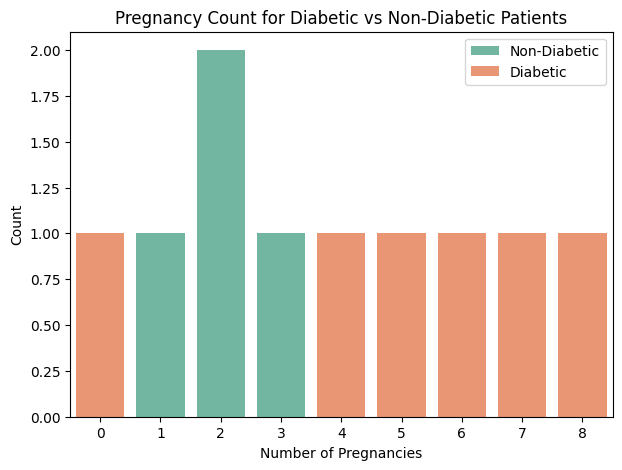

In [10]:
#  Bar chart showing pregnancies count for diabetic and non-diabetic patients
plt.figure(figsize=(7,5))
sns.countplot(x="Pregnancies", hue="Outcome", data=df, palette="Set2")
plt.title("Pregnancy Count for Diabetic vs Non-Diabetic Patients")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Count")
plt.legend(["Non-Diabetic", "Diabetic"])
plt.show()

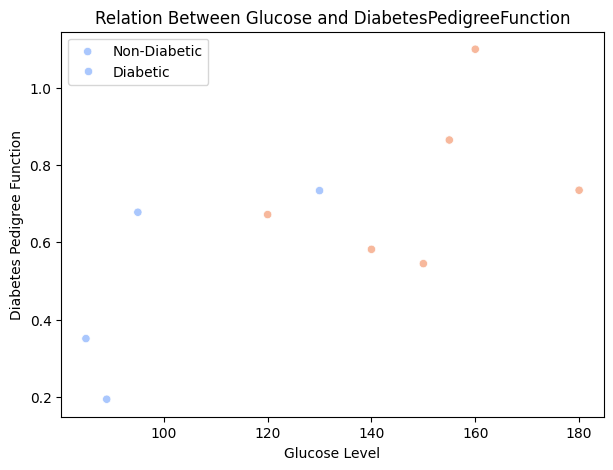

In [11]:
#  Show relation between Glucose and DiabetesPedigreeFunction
plt.figure(figsize=(7,5))
sns.scatterplot(x="Glucose", y="DiabetesPedigreeFunction", hue="Outcome", data=df, palette="coolwarm")
plt.title("Relation Between Glucose and DiabetesPedigreeFunction")
plt.xlabel("Glucose Level")
plt.ylabel("Diabetes Pedigree Function")
plt.legend(["Non-Diabetic", "Diabetic"])
plt.show()

In [12]:
#  Print records of patients who are diabetic or have Glucose > 150
diabetic_or_high_glucose = df[(df["Outcome"] == 1) | (df["Glucose"] > 150)]
print("\n Patients who are Diabetic OR have Glucose > 150:\n", diabetic_or_high_glucose)


 Patients who are Diabetic OR have Glucose > 150:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            5      120             74             35      130  32.1   
2            0      150             80             40        0  35.5   
4            6      180            105             45      200  28.3   
6            4      140             85             37      150  37.1   
7            7      155            110             50      220  38.5   
8            8      160            100             30      190  41.2   

   DiabetesPedigreeFunction  Age  Outcome  
1                     0.672   40        1  
2                     0.545   35        1  
4                     0.735   45        1  
6                     0.582   55        1  
7                     0.865   60        1  
8                     1.100   65        1  
